In [1]:
#Importing necessery libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('./Project detail-SG.xlsx')
df.head()

,Project Name,Sector,Hours,HKS_Office,Month
0,00111.077 HKS IT SHANGHAI,Enterprise,1.17,Enterprise,2021-01-01 00:00:00
1,60206.000 Hong Kong Dept of Health Clinic Design,Healthcare Sector,10.00,Singapore,2021-01-01 00:00:00
2,00111.068 HKS IT SINGAPORE,Enterprise,13.25,Enterprise,2021-01-01 00:00:00
3,60176.000 Military Medical Complex,Healthcare Sector,59.00,Dubai,2021-01-01 00:00:00
4,"00102.017 HKS Inc_ IT, ADMIN,ACCOUNTING",Enterprise,37.00,Enterprise,2021-01-01 00:00:00


In [3]:
len(df)

498

In [4]:
df.dtypes

Project Name     object
Sector           object
Hours           float64
HKS_Office       object
Month            object
dtype: object

In [5]:
df.isnull().sum()

Project Name    0
Sector          0
Hours           0
HKS_Office      0
Month           0
dtype: int64

In [6]:
df.columns

Index(['Project Name', 'Sector', 'Hours', 'HKS_Office', 'Month'], dtype='object')

### Top Performing Sectors 

Top performing Sectors refer to those sectors that are getting the maximum number of Projects

In [7]:
data = df.Sector.value_counts().sort_values(ascending=False)
top_sectors=pd.DataFrame(data)
top_sectors.reset_index(inplace=True)
top_sectors.rename(columns={'index':'Sector', 'Sector':'Total Count'}, inplace=True)
top_sectors


,Sector,Total Count
0,Healthcare Sector,158
1,Commercial/Mixed Use,128
2,Mission Critical,81
3,Hospitality,53
4,Enterprise,45
5,Sports Sector,15
6,Commercial Interiors,14
7,Commercial/Mized use,3
8,Community Practice,1


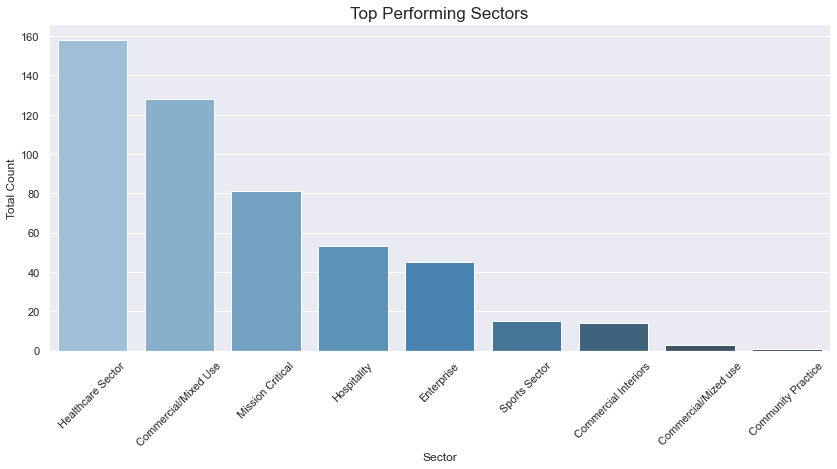

In [8]:
sns.set(rc={'figure.figsize':(14,6)})
fig_1=sns.barplot(x="Sector", y="Total Count", data=top_sectors, palette='Blues_d') 
fig_1.set_title('Top Performing Sectors',fontsize=17)
fig_1.set_ylabel('Total Count',fontsize=12)
fig_1.set_xlabel('Sector',fontsize=12)
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45)
plt.show()

From the above observation we see that the Healthcare Sector has the maximum number of Projects while Community Practice has the lowest number of Projects

## Top Performing HKS_Office 

In [9]:

office_name = df.HKS_Office.value_counts().sort_values(ascending=False)

office=pd.DataFrame(office_name) 
office.reset_index(inplace=True)
office.rename(columns={'index':'HKS_Office', 'HKS_Office':'Total Count'}, inplace=True)
office

,HKS_Office,Total Count
0,Dallas,94
1,Chicago,89
2,Atlanta,88
3,Enterprise,46
4,Structural,32
5,Houston,28
6,Salt Lake City,18
7,Washington DC,14
8,Chicago,14
9,Houston,11


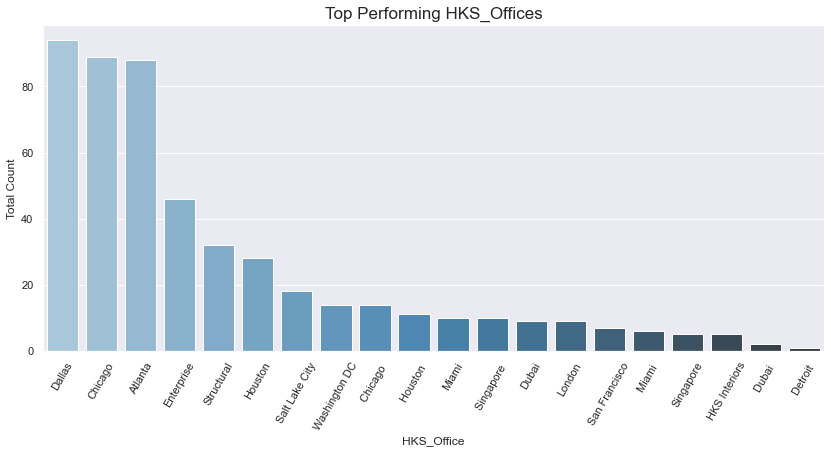

In [10]:
sns.set(rc={'figure.figsize':(14,6)})
fig_1=sns.barplot(x="HKS_Office", y="Total Count", data=office, palette='Blues_d') 
fig_1.set_title('Top Performing HKS_Offices',fontsize=17)
fig_1.set_ylabel('Total Count',fontsize=12)
fig_1.set_xlabel('HKS_Office',fontsize=12)
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=60)
plt.show()

Dallas has the the Maximum number of HKS_Office while Detroit has the least number of HKS_Offices

## Time spent per sector 

In [11]:
sector_time = df.groupby('Sector').sum().reset_index() 
#sector_time.columns

In [12]:
sector_time = sector_time.sort_values(by='Hours', ascending=False)

In [13]:
sector_time

,Sector,Hours
1,Commercial/Mixed Use,20735.95
5,Healthcare Sector,17290.86
7,Mission Critical,11183.20
6,Hospitality,10082.80
0,Commercial Interiors,1545.25
8,Sports Sector,1466.25
4,Enterprise,1461.77
2,Commercial/Mized use,205.00
3,Community Practice,132.00


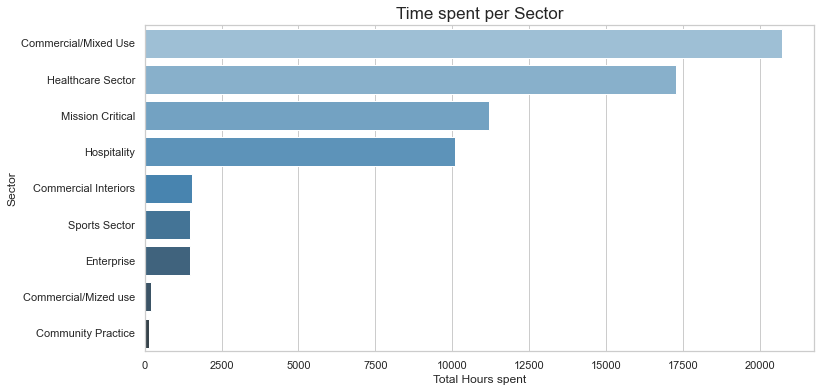

In [14]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('whitegrid')

fig_5=sns.barplot(x="Hours", y="Sector", data=sector_time, palette='Blues_d',orient='h')
fig_5.set_title('Time spent per Sector',fontsize=17)
fig_5.set_ylabel('Sector') 
fig_5.set_xlabel('Total Hours spent')
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=90)
plt.show()

* Maximum number of time is spent on the Projects in the Commercial/Mixed Use  Sector
* Community Practice Sector projects take the least amount of Time

In [15]:
df.head(5)

,Project Name,Sector,Hours,HKS_Office,Month
0,00111.077 HKS IT SHANGHAI,Enterprise,1.17,Enterprise,2021-01-01 00:00:00
1,60206.000 Hong Kong Dept of Health Clinic Design,Healthcare Sector,10.00,Singapore,2021-01-01 00:00:00
2,00111.068 HKS IT SINGAPORE,Enterprise,13.25,Enterprise,2021-01-01 00:00:00
3,60176.000 Military Medical Complex,Healthcare Sector,59.00,Dubai,2021-01-01 00:00:00
4,"00102.017 HKS Inc_ IT, ADMIN,ACCOUNTING",Enterprise,37.00,Enterprise,2021-01-01 00:00:00


In [16]:
# Change the type of columns  to_datetime
df['Month'] = pd.to_datetime(df['Month']) 

In [17]:
df2 = df.groupby('Month').count().reset_index()
df2 = df2.drop(columns =['Sector','Hours', 'HKS_Office'])
df2

,Month,Project Name
0,2021-01-01,23
1,2021-02-01,27
2,2021-03-01,28
3,2021-04-01,24
4,2021-05-01,22
5,2021-06-01,20
6,2021-07-01,28
7,2021-08-01,29
8,2021-09-01,35
9,2021-10-01,36


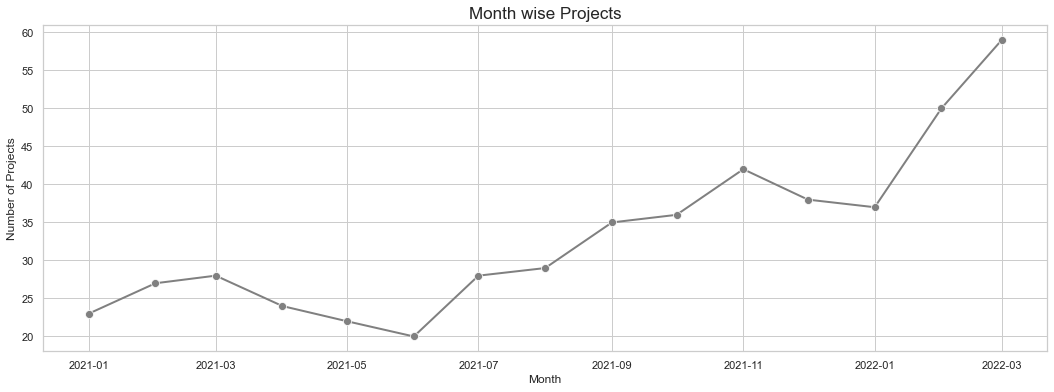

In [18]:
sns.set(rc={'figure.figsize':(18,6)})
sns.set_style('whitegrid')
fig_5 = sns.lineplot(data=df2,x='Month',y='Project Name',linewidth=2,markersize=8,marker='o',color='gray')
fig_5.set_title('Month wise Projects',fontsize=17)
fig_5.set_ylabel('Number of Projects') 
fig_5.set_xlabel('Month')
plt.show()



We see that the Number of Projects over the months is increasing overall 
* From March 2021 to June 2021 There was drop in the number of Projects with June 2021 recording the Lowest number of Overall Projects with a score of 20
* In the Year 2022 we see a sharp increase in the number of Projects 
* March 2022 had the Maximum number of Projects so far with a score of 59.

## Maximum Time spent on Projects

In [19]:
df3 = df.groupby('Project Name').sum().reset_index()
df3 = df3.sort_values(by='Hours', ascending=False).head(10)
df3

,Project Name,Hours
65,23819.000A_1020 Spring Street Office building,2811.87
93,24464.010. Mercy Fort Smith ED/ICU Expansion,2367.50
47,"23383.000'Autograph Collection Hotels , San An...",2355.17
121,24994.000_ORD059,2226.15
40,22671.000' Ralph McGill- Parcel A- Phase 2,2225.50
23,21274.000 BYU Fine Arts Building,1953.50
60,"23559.150 -Catholic Health Initiative, Baylor,...",1880.00
54,23531.000' Kimpton Hotel,1784.50
31,22413.110'Reston Row Parking Garage West,1691.25
86,24391.000' Jungle Island,1610.25


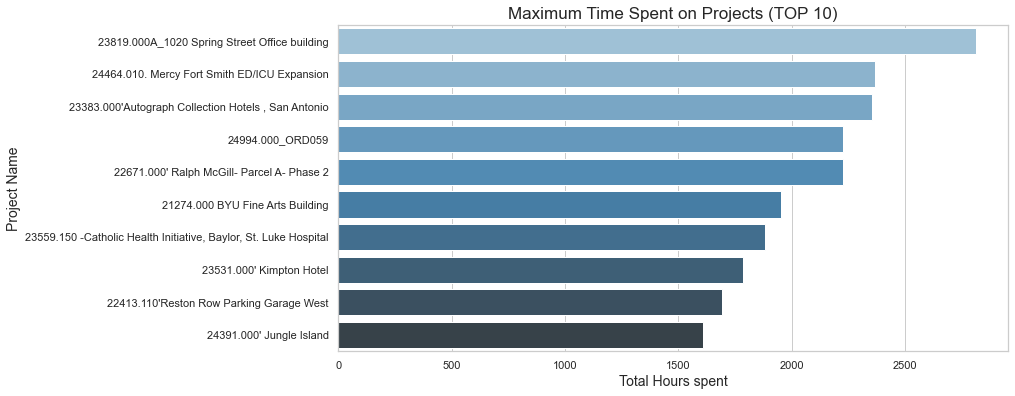

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('whitegrid')

fig_5=sns.barplot(x="Hours", y="Project Name", data=df3, palette='Blues_d',orient='h')
fig_5.set_title('Maximum Time Spent on Projects (TOP 10)',fontsize=17)
fig_5.set_ylabel('Project Name',fontsize=14) 
fig_5.set_xlabel('Total Hours spent',fontsize=14)
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=90)
plt.show()

Maximum number of time spent on the 23819.000A_1020 Spring Street Office building  Projects is 2811.87 Hours, for 9 projects all of them being in the Commercial/Mixed Use Sector 

In [41]:
df3 = df.groupby('Project Name').sum().reset_index()
df3 = df3.sort_values(by='Hours', ascending=False).head(10)
df3

,Project_Name,Sector,Hours,HKS_Office,Month
0,"00102.017 HKS Inc_ IT, ADMIN,ACCOUNTING",15,15,15,15
60,"23559.150 -Catholic Health Initiative, Baylor,...",12,12,12,12
68,23888.000 Neuhoff Nashville Mixed Use – Reside...,11,11,11,11
93,24464.010. Mercy Fort Smith ED/ICU Expansion,9,9,9,9
54,23531.000' Kimpton Hotel,9,9,9,9
47,"23383.000'Autograph Collection Hotels , San An...",9,9,9,9
65,23819.000A_1020 Spring Street Office building,9,9,9,9
119,24947.000 iHeart Media,9,9,9,9
82,24269.000 AWS CMH063 Data Center,8,8,8,8
40,22671.000' Ralph McGill- Parcel A- Phase 2,8,8,8,8


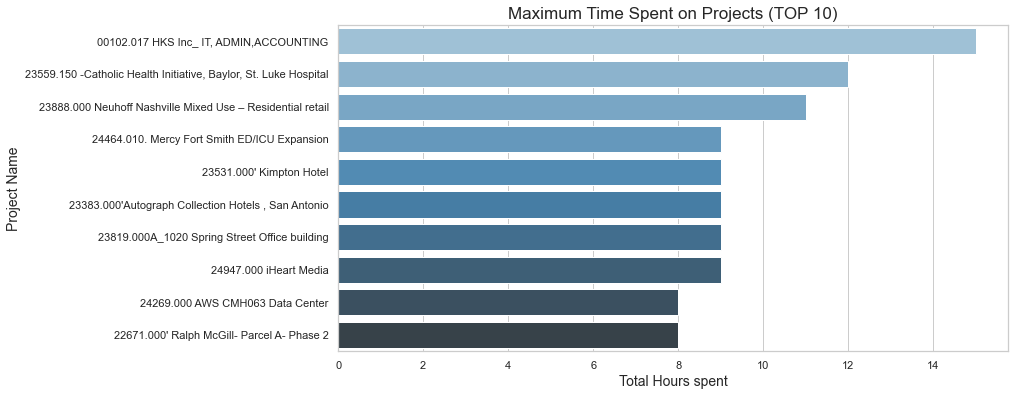

In [42]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('whitegrid')

fig_5=sns.barplot(x="Hours", y="Project_Name", data=df3, palette='Blues_d',orient='h')
fig_5.set_title('Maximum Time Spent on Projects (TOP 10)',fontsize=17)
fig_5.set_ylabel('Project Name',fontsize=14) 
fig_5.set_xlabel('Total Hours spent',fontsize=14)
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=90)
plt.show()

00102.017 HKS Inc_ IT, ADMIN,ACCOUNTING has the Maximum number of Projects  all of them being in the Enterprise Sector with a Project done Every Month from January 2021 to March 2022